In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:789


In [2]:
using LinearAlgebra, Statistics, Compat


# Exercise 2

In [3]:
using BenchmarkTools

In [4]:
Σ = [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  870.571 ns (10 allocations: 1.94 KiB)


2×2 Array{Float64,2}:
 0.666667     1.11022e-16
 1.11022e-16  0.666667   

In [5]:
using StaticArrays

Σ = SMatrix{2, 2}([0.4  0.3;
     0.3  0.45])
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime gain($Σ, $G, $R)

  13.684 ns (0 allocations: 0 bytes)


2×2 SArray{Tuple{2,2},Float64,2,4}:
 0.666667     1.11022e-16
 2.22045e-16  0.666667   

# Exercise 3

p = Poly(2 - 5*x + 2*x^2)
(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [2.0, 0.5]


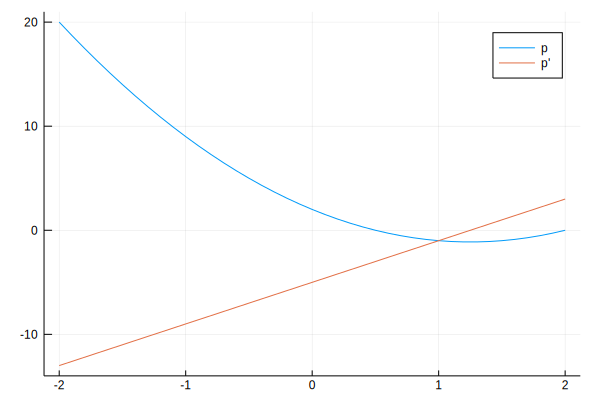

In [6]:
using Polynomials, Plots

p = Poly([2, -5, 2], :x)  # :x just gives a symbol for display

@show p
p′ = polyder(p)   # gives the derivative of p, another polynomial
@show p(0.1), p′(0.1)  # call like a function
@show roots(p);   # find roots such that p(x) = 0

x = -2:0.1:2
y_1 = [p(x) for x in x]
y_2 = [p′(x) for x in x]

plot(x, y_1, label = "p")
plot!(x, y_2, label = "p'")

# Exercise 4

In [7]:
using ForwardDiff

# good style
function newtonsmethod(p::Poly, x_0; tolerance = 1E-7, maxiter = 100)
    # setup the algorithm
    x_old = x_0
    normdiff = 1
    iter = 1
    p_prime = polyder(p)
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old - p(x_old) / p_prime(x_old) # use the passed in map
        normdiff = abs(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

p = Poly([2, -5, 2], :x)

x_0 = 3

sol = newtonsmethod(p, x_0)
println("Root = $(sol.value), and tolerance = $(sol.normdiff) in $(sol.iter)"*
        " iterations")
@show roots(p);

Root = 2.0, and tolerance = 2.76667577736589e-13 in 7 iterations
roots(p) = [2.0, 0.5]


# Exercise 5

In [8]:
function trapezoidal(f::AbstractArray, x::AbstractArray)
    @assert length(f) == length(x)
    integrate = 0
    for i in 2:length(f)
        integrate += (f[i - 1] + f[i]) / 2 * (x[i] - x[i - 1])
    end
    return integrate
end

function trapezoidal(f::AbstractArray, x::AbstractRange)
    @assert length(f) == length(x)
    integrate = 0
    for i in 2:length(f)
        integrate += (f[i - 1] + f[i]) / 2 * (x[i] - x[i - 1])
    end
    return integrate
end

function trapezoidal(f::Function, x̲::Real, x̄::Real, N::Real)
    x = range(x̲, stop = x̄, length = N)
    y = [f(z) for z in x]
    return trapezoidal(y, x)
end

trapezoidal (generic function with 3 methods)

In [21]:
x = 0.0:0.01:1.0 #x is a range
f(x) = x^2 - x^3
y = [f(z) for z in x]
@show trapezoidal(y, x)

x = collect(x) #Now x is an Array
@show trapezoidal(y, x)

@show trapezoidal(f, 0.0, 1.0, 1000);

trapezoidal(y, x) = 0.083325
trapezoidal(y, x) = 0.083325
trapezoidal(f, 0.0, 1.0, 1000) = 0.0833332498330829


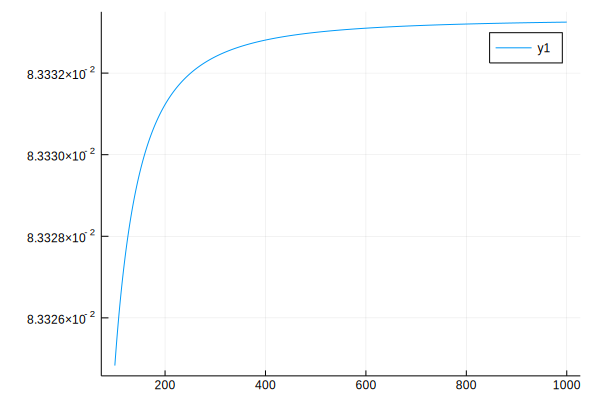

In [22]:
grid_x = 100:1000
grid_y = [trapezoidal(f, 0.0, 1.0, N) for N in grid_x]
plot(grid_x, grid_y)

# Exercise 6

In [31]:
using ForwardDiff

f(x) = x^2

D(x) = ForwardDiff.derivative(y -> trapezoidal(f, 0.0, y, 100), x)

@show f(0.5)
@show D(0.5)

f(0.5) = 0.25
D(0.5) = 0.25001275380063254


0.25001275380063254